<a href="https://colab.research.google.com/github/chaos1231107/2023_2nd_simester/blob/kinematics/2023_12_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1,)
])

In [6]:
optimizer = tf.keras.optimizers.Adam(1e-2)

In [8]:
def loss_fn(y_true, y_pred):
    loss = tf.math.square(y_true - y_pred)
    return tf.math.reduce_mean(loss)

In [9]:
def omega(model, t):
    with tf.GradientTape() as tape:
        t_tf = tf.constant(t)
        tape.watch(t_tf)
        theta = model(t_tf)
    omega_cal = tape.gradient(theta, t_tf)
    del tape
    return omega_cal

In [10]:
t = np.linspace(0,2,100)

In [15]:
#initial condition
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        omega_cal = omega(model, t)
        loss1 = loss_fn(np.pi, omega_cal)
        loss2 = loss_fn(np.pi/6, model(tf.constant([0.])))
        loss = tf.cast(loss1, dtype='float32') + loss2
        loss = tf.cast(loss1, dtype='float32') + loss2
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    print('Epoch %s: Loss %.4f' % (num_epoch, loss.numpy()))

Epoch 0: Loss 0.3729
Epoch 1: Loss 0.3471
Epoch 2: Loss 0.3146
Epoch 3: Loss 0.2797
Epoch 4: Loss 0.2452
Epoch 5: Loss 0.2126
Epoch 6: Loss 0.1834
Epoch 7: Loss 0.1583
Epoch 8: Loss 0.1377
Epoch 9: Loss 0.1217
Epoch 10: Loss 0.1103
Epoch 11: Loss 0.1030
Epoch 12: Loss 0.0994
Epoch 13: Loss 0.0988
Epoch 14: Loss 0.1004
Epoch 15: Loss 0.1035
Epoch 16: Loss 0.1073
Epoch 17: Loss 0.1112
Epoch 18: Loss 0.1148
Epoch 19: Loss 0.1176
Epoch 20: Loss 0.1194
Epoch 21: Loss 0.1203
Epoch 22: Loss 0.1201
Epoch 23: Loss 0.1191
Epoch 24: Loss 0.1175
Epoch 25: Loss 0.1153
Epoch 26: Loss 0.1128
Epoch 27: Loss 0.1103
Epoch 28: Loss 0.1078
Epoch 29: Loss 0.1055
Epoch 30: Loss 0.1034
Epoch 31: Loss 0.1018
Epoch 32: Loss 0.1005
Epoch 33: Loss 0.0996
Epoch 34: Loss 0.0990
Epoch 35: Loss 0.0987
Epoch 36: Loss 0.0987
Epoch 37: Loss 0.0989
Epoch 38: Loss 0.0991
Epoch 39: Loss 0.0995
Epoch 40: Loss 0.0998
Epoch 41: Loss 0.1001
Epoch 42: Loss 0.1003
Epoch 43: Loss 0.1005
Epoch 44: Loss 0.1006
Epoch 45: Loss 0.100

4/4 [==============================] - 1s 5ms/step


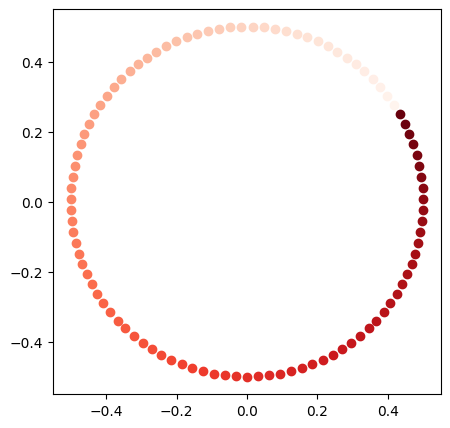

In [16]:
from matplotlib.pyplot import cm
color = cm.Reds(np.linspace(0,1,100))
theta = model.predict(t)
plt.figure(figsize=(5,5))
for x, y, c in zip(0.5*np.cos(theta), 0.5*np.sin(theta), color):
    plt.scatter(x, y, color=c)

In [17]:
t = np.linspace(0,2,100)
omega_measured = np.pi + 0.01*np.random.normal(size=(100,))

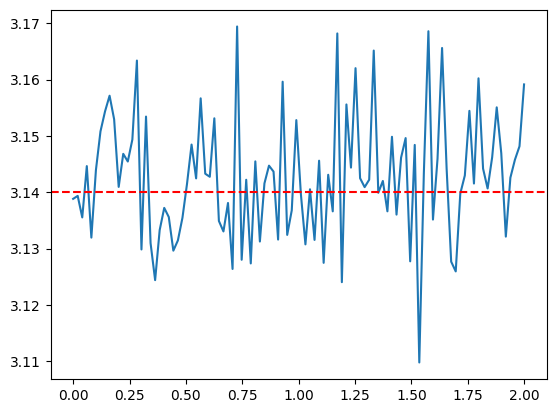

In [23]:
plt.plot(t, omega_measured)
plt.axhline(y=3.14, color='r', linestyle='--')
plt.show()

In [25]:
## sympy, tensorflow